### Проект: Статистический анализ данных
Нам передали данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.   
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
### **Описание данных**
В основных данных есть информация о пользователях, их поездках и подписках.   

**Пользователи — users_go.csv** 
- **user_id** - уникальный идентификатор пользователя
- **name** - имя пользователя
- **age** - возраст
- **city** - город
- **subscription_type** - тип подписки (free, ultra)

**Поездки — rides_go.csv**   
- **user_id** - уникальный идентификатор пользователя
- **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- **date** - дата совершения поездки

**Подписки — subscriptions_go.csv**
- **subscription_type** - тип подписки
- **minute_price** - стоимость одной минуты поездки по данной подписке
- **start_ride_price** - стоимость начала поездки
- **subscription_fee** - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пользователи   содержит 5 столбцов и 1565 строк   
Поездки   содержит 4 столбца и 18068 строк   
Подписки   содержит 4 столбца и 2 строки   
Пропусков в данных нет, проверку дубликатов и изменение формата даты произведем на этапе предобработки далее.

#### Шаг 2. Предобработка данных

1. Приведем столбец **date** датафрейма **rides** к типу даты pandas

In [9]:
rides['date'] = pd.to_datetime(rides['date'])

2. Создадим новый столбец с номером месяца на основе столбца **date**

In [10]:
rides['month'] = rides['date'].dt.month

3. Пропущенных значений в датафреймах нет (мы в этом убедились на этапе оценки датафреймов), проверим на наличие дубликатов

In [11]:
duplicates_users = users.duplicated().sum()
duplicates_users

31

In [12]:
duplicates_rides = rides.duplicated().sum()
duplicates_rides

0

In [13]:
duplicates_subs = subs.duplicated().sum()
duplicates_subs

0

В датафрейме обнаружено 31 полный дубликат - удалим эти повторения и проверим результат

In [14]:
users.drop_duplicates(inplace=True)
duplicates_users = users.duplicated().sum()
duplicates_users

0

На этапе предобработки данных мы   
- привели столбец дата к формату pandas date
- вывели номер месяца в отдельный столбец
- убедились в отсутствии пропусков
- нашли и обработали (удалили) повторения

#### Шаг 3. Исследовательский анализ данных

Визуализируем общую информацию о пользователях и поездках.

1. Частота встречаемости городов

In [15]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

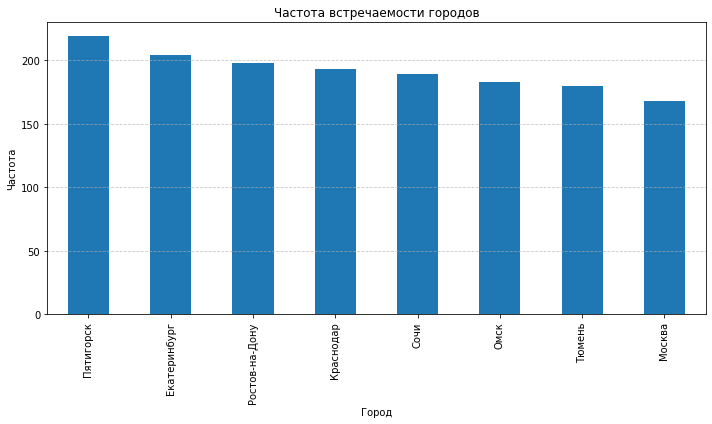

In [16]:
plt.figure(figsize=(10, 6))
users['city'].value_counts().plot(kind='bar')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Больше всего пользователей в Пятигорске и меньше всего в Москве.

2. Соотношение пользователей с подпиской и без подписки.

In [17]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

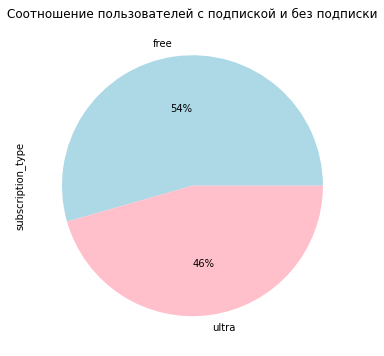

In [18]:
plt.figure(figsize=(6, 6))
users['subscription_type'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    colors=['lightblue', 'pink'])
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Пользователей без подписки больше половины - 54%

3. Возраст пользователей.

In [19]:
users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

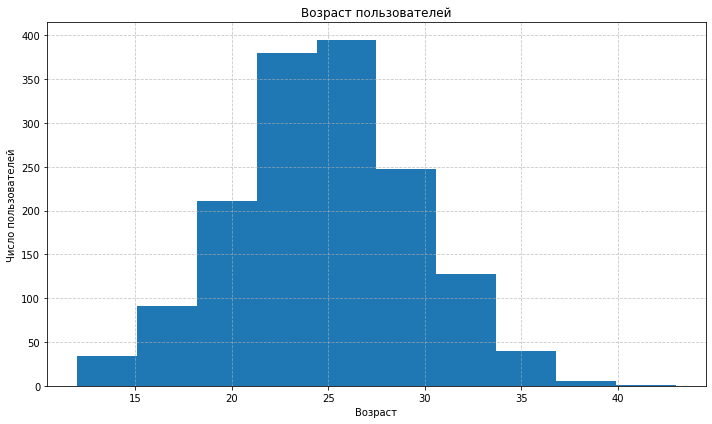

In [20]:
plt.figure(figsize=(10, 6))
users['age'].plot(kind='hist')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

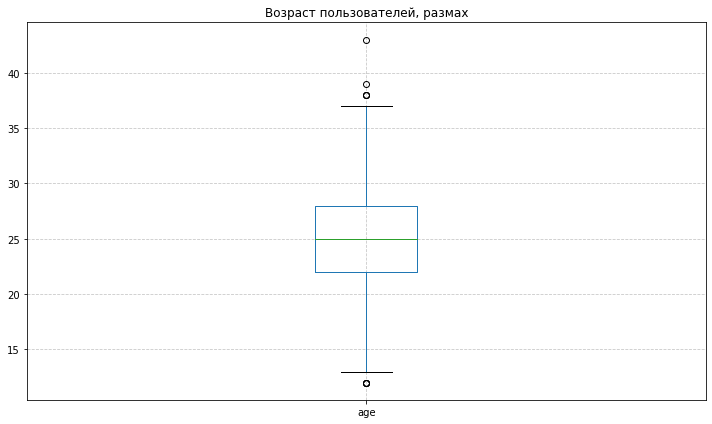

In [21]:
plt.figure(figsize=(10, 6))
users['age'].plot(kind='box')
plt.title('Возраст пользователей, размах')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Большая часть пользователей в возрасте от 22 до 28 лет, есть выбросы. Минимальный возраст 12 лет, максимальный 43.

4. Расстояние, которое пользователь преодолел за одну поездку.

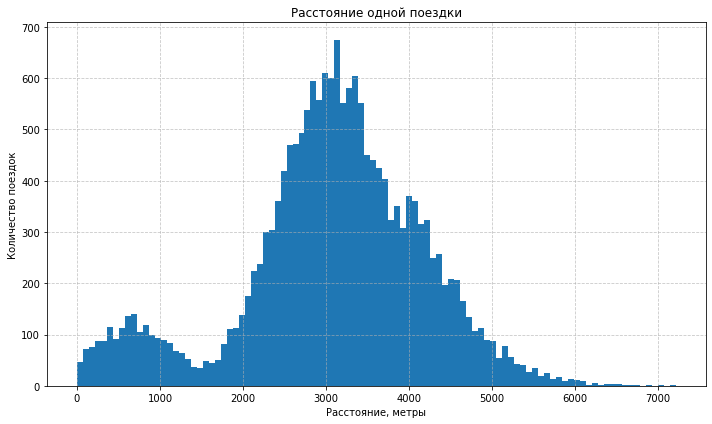

In [23]:
plt.figure(figsize=(10, 6))
rides['distance'].plot(kind='hist', bins =100)
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество поездок')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

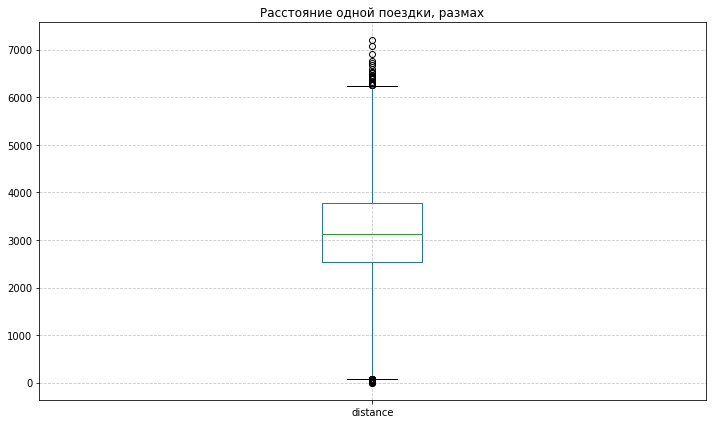

In [24]:
plt.figure(figsize=(10, 6))
rides['distance'].plot(kind='box', whis = 2)
plt.title('Расстояние одной поездки, размах')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Большая часть поездок от ~2600 до ~3800 метров, есть выбросы. Минимальное расстояние 86 сантиметров, максимальное ~7.2 км.

5. Продолжительность поездок

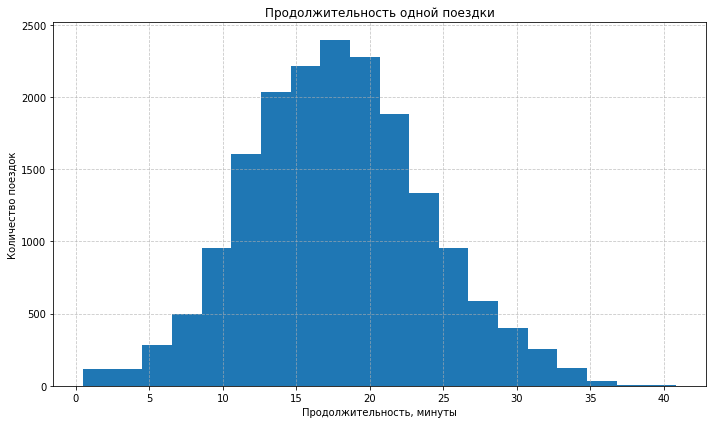

In [26]:
plt.figure(figsize=(10, 6))
rides['duration'].plot(kind='hist', bins = 20)
plt.title('Продолжительность одной поездки')
plt.xlabel('Продолжительность, минуты')
plt.ylabel('Количество поездок')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

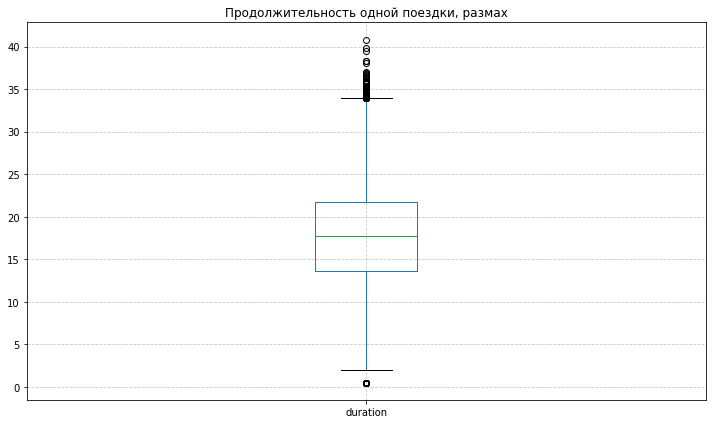

In [27]:
plt.figure(figsize=(10, 6))
rides['duration'].plot(kind='box')
plt.title('Продолжительность одной поездки, размах')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

После визуализации данных о поездках и пользователях мы установили:
- больше всего пользователей из Пятигорска, меньше всего из Москвы, распределение нормальное, без выбросов
- пользователей без подписки 54%, с подпиской 46%
- основная возрастная категоря пользователей от 22 до 28 лет, распределение нормальное, есть незначительное количество выбросов
- большая часть поездок от ~2600 до ~3800 метров, распределение нормальное
- больше всего поездок в интервале от ~14 до ~22 минут, распределение нормальное. Минимальное время поездки полминуты, максимальное ~41 минуты.

#### Шаг 4. Объединение данных

1. Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [29]:
merged = pd.merge(rides, users, on='user_id')
merged = pd.merge(merged, subs, on='subscription_type')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


2. Создадим ещё два датафрейма из датафрейма, созданного на предыдущем этапе

- c данными о пользователях без подписки

In [30]:
subs_free = merged.loc[merged['subscription_type'] == 'free']
subs_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


- с данными о пользователях с подпиской

In [31]:
subs_ultra = merged.loc[merged['subscription_type'] == 'ultra']
subs_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

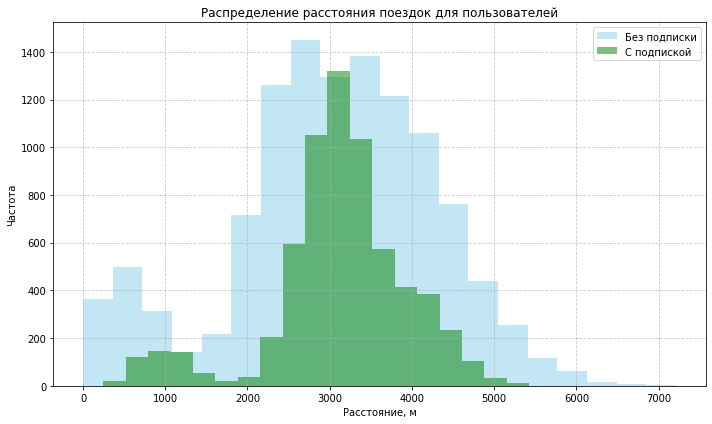

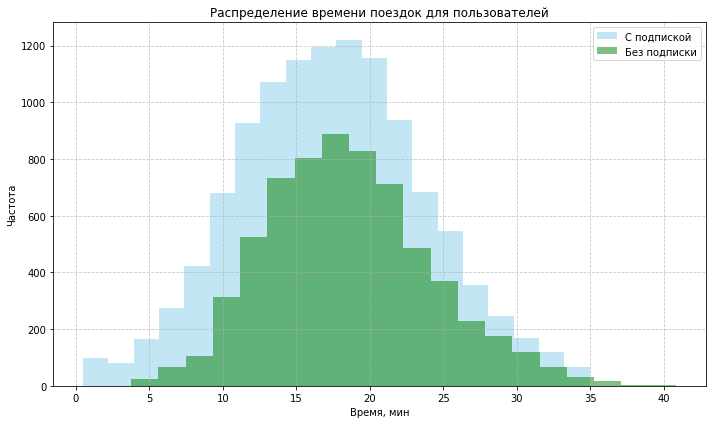

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(subs_free['distance'], bins=20, alpha=0.5, label='Без подписки', color='skyblue')
plt.hist(subs_ultra['distance'], bins=20, alpha=0.5, label='С подпиской', color='green')
plt.title('Распределение расстояния поездок для пользователей')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.tight_layout()
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(subs_free['duration'], bins=20, alpha=0.5, label='С подпиской', color='skyblue')
plt.hist(subs_ultra['duration'], bins=20, alpha=0.5, label='Без подписки', color='green')
plt.title('Распределение времени поездок для пользователей')
plt.xlabel('Время, мин')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Объединили данные о пользователях, поездках и тарифах в один датафрейм - merged.

Создали еще два датафрейма
- subs_free - информация о пользователях без подписки
- subs_ultra - информация о пользователях с платной подпиской   

Визуализировали информацию о расстоянии и времени для пользователей с бесплатной подпиской и платной.   
Пользователи без подписки за одну поездку проезжают приблизительно от 2 до 4.5 километров и тратят на это от 10 до 25 минут. Есть поездки меньше и больше, как по дистанции так и по времени   
Пользователи с подпиской за одну поездку проезжают приблизительно от 2.5 до 3.5 километров, с временем поездки от 12 до 23 минут
Пользователи без подписки ездят дальше и дольше, чем пользователи с подпиской.

#### Шаг 5. Подсчёт выручки

1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [33]:
agg_merged = pd.pivot_table(merged,
                           index=['user_id', 'month'],
                           values = ['distance', 'name', 'duration', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'name' : len,
                                      'duration' : sum, 
                                      'subscription_type' : min})
agg_merged.rename(columns = {'name' : 'rides'}, inplace = True)
agg_merged

distance   duration  rides subscription_type
user_id month                                                  
1       1       7027.511294  41.416640      2             ultra
        4        754.159807   6.232113      1             ultra
        8       6723.470560  44.776802      2             ultra
        10      5809.911100  31.578017      2             ultra
        11      7003.499363  53.397424      3             ultra
...                     ...        ...    ...               ...
1534    6       3409.468534  24.812678      2              free
        8       7622.453034  47.205960      2              free
        9       4928.173852  22.560373      1              free
        11     13350.015305  76.342174      4              free
        12      2371.711192  15.893917      1              free

[11331 rows x 4 columns]

2. Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [34]:
# округлим продолжительность поездок до целого числа
merged['duration'] = np.ceil(merged['duration'])
merged

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,20.0,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,22.0,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,19.0,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,17.0,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Добавим выручку от каждой поездки

In [35]:
merged['income'] = merged.apply(
    lambda row: row['start_ride_price'] +
    row['minute_price'] * row['duration'],
    axis=1
)

In [36]:
agg_income = pd.pivot_table(merged,
                            index=['user_id', 'month'],
                            values=['income'],
                            aggfunc={'income': sum})

agg_merged['income'] = agg_income['income']
agg_merged.loc[agg_merged['subscription_type'] == 'ultra', 'income'] += 199
agg_merged.head()

distance   duration  rides subscription_type  income
user_id month                                                         
1       1      7027.511294  41.416640      2             ultra   451.0
        4       754.159807   6.232113      1             ultra   241.0
        8      6723.470560  44.776802      2             ultra   475.0
        10     5809.911100  31.578017      2             ultra   391.0
        11     7003.499363  53.397424      3             ultra   535.0

#### Шаг 6. Проверка гипотез

1. Тратят ли пользователи с подпиской больше времени на поездки? 

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

H_0: Время duration пользователей на подписке ultra = время duration пользователей на подписке free

H_1: Время duration пользователей на подписке ultra > время duration пользователей на подписке free

alpha = 0.05

In [37]:
ultra = subs_ultra['duration'] 

free = subs_free['duration']

results = st.ttest_ind(
    ultra,
    free,
    alternative = 'greater'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue > alpha:
    print('Не удалось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Проверим гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

H_0: Расстояние пользователей c подпиской = 3130 метров

H_1: Расстояние пользователей c подпиской > 3130 метров

alpha = 0.05

In [38]:
ultra_distance = subs_ultra['distance'] 

target_distance = 3130

alpha = 0.05

results = st.ttest_1samp(
    ultra_distance, 
    target_distance,
    alternative='greater'
)

print(results.pvalue)

if results.pvalue > alpha:
    print('Не удалось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу. Мы можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra, не превышает 3130 метров.

3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Проверим гипотезу:

H_0: Выручка от пользователей с подпиской = выручке пользователей без подписки

H_1: Выручка от пользователей с подпиской > выручке пользователей без подписки

alpha = 0.05

In [39]:
income_ultra = agg_merged.loc[agg_merged['subscription_type'] == 'ultra', 'income']

income_free = agg_merged.loc[agg_merged['subscription_type'] == 'free', 'income']

results = st.ttest_ind(
    income_ultra,
    income_free,
    alternative = 'greater'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue > alpha:
    print('Не удалось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - можем утверждать, что выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

4. Предлагаю использовать гипотезу о равенстве средних для зависимых выборок.

Формулировка:

H0 : μ1 = μ2   
H1 : μ1 != μ2   
μ1 и μ2 - средние значения количества обращений в техподдержку до и после изменения.

Метод, который необходимо использовать при сравнении - scipy.stats.ttest_rel

### Выводы
Нам передали данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.   
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
**Описание данных**
В основных данных есть информация о пользователях, их поездках и подписках.   

**Пользователи — users_go.csv** 
- **user_id** - уникальный идентификатор пользователя
- **name** - имя пользователя
- **age** - возраст
- **city** - город
- **subscription_type** - тип подписки (free, ultra)

**Поездки — rides_go.csv**   
- **user_id** - уникальный идентификатор пользователя
- **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- **date** - дата совершения поездки

**Подписки — subscriptions_go.csv**
- **subscription_type** - тип подписки
- **minute_price** - стоимость одной минуты поездки по данной подписке
- **start_ride_price** - стоимость начала поездки
- **subscription_fee** - стоимость ежемесячного платежа

**1.Шаг загрузка и изучение:**   
Пользователи   содержит 5 столбцов и 1565 строк   
Поездки   содержит 4 столбца и 18068 строк   
Подписки   содержит 4 столбца и 2 строки   
Пропусков в данных нет, проверку дубликатов и изменение формата даты произведем на этапе предобработки далее.

**2.Шаг предобработка:**   
На данном этапе
- привели столбец дата к формату pandas date
- вывели номер месяца в отдельный столбец
- убедились в отсутствии пропусков
- нашли и обработали (удалили) повторения

**3.Шаг визуализация:**   
После визуализации данных о поездках и пользователях мы установили:
- больше всего пользователей из Пятигорска, меньше всего из Москвы, распределение нормальное, без выбросов
- пользователей без подписки 54%, с подпиской 46%
- основная возрастная категоря пользователей от 22 до 28 лет, распределение нормальное, есть незначительное количество выбросов
- большая часть поездок от ~2600 до ~3800 метров, распределение нормальное
- больше всего поездок в интервале от ~14 до ~22 минут, распределение нормальное

**4.Шаг объединение:**   
Объединили данные о пользователях, поездках и тарифах в один датафрейм - merged.

Создали еще два датафрейма
- subs_free - информация о пользователях без подписки
- subs_ultra - информация о пользователях с платной подпиской   

Визуализировали информацию о расстоянии и времени для пользователей с бесплатной подпиской и платной.   
Пользователи без подписки за одну поездку проезжают приблизительно от 2 до 4.5 километров и тратят на это от 10 до 25 минут. Есть поездки меньше и больше, как по дистанции так и по времени   
Пользователи с подпиской за одну поездку проезжают приблизительно от 2.5 до 3.5 километров, с временем поездки от 12 до 23 минут
Пользователи без подписки ездят дальше и дольше, чем пользователи с подпиской.

**5.Шаг подсчет выручки:**   
Создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.   
Добавили столбец с помесячной выручкой, которую принёс каждый пользователь

**6.Шаг проверка гипотез:**
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. - Отвергли нулевую гипотезу
- расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров - Не удалось отвергнуть нулевую гипотезу
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки - Отвергли нулевую гипотезу